# Download the data

In [1]:
# https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

In [2]:
# !kaggle datasets download -d sakshigoyal7/credit-card-customers

In [3]:
# ls

In [4]:
# !unzip credit-card-customers.zip

In [5]:
# ls

# Read the data

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('BankChurners.csv')

# We will drop two last columns from the table
df = df.drop([
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
    axis=1)

In [8]:
df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

# Columns description

- CLIENTNUM - Client number. Unique identifier for the customer holding the account
- Attrition_Flag - Internal event (customer activity) variable, Existing Customer or Attrited Customer
- Customer_Age - Demographic variable - Customer's Age in Years
- Gender - Demographic variable - M=Male, F=Female
- Dependent_count - Demographic variable - Number of dependents
- Education_Level - Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
- Marital_Status - Demographic variable - Married, Single, Divorced, Unknown
- Income_Category - Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > 
- Card_Category - Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
- Months_on_book - Period of relationship with bank
- Total_Relationship_Count - Total no. of products held by the customer
- Months_Inactive_12_mon - No. of months inactive in the last 12 months
- Contacts_Count_12_mon - No. of Contacts in the last 12 months
- Credit_Limit - Credit Limit on the Credit Card
- Total_Revolving_Bal - Total Revolving Balance on the Credit Card
- Avg_Open_To_Buy - Open to Buy Credit Line (Average of last 12 months)
- Total_Amt_Chng_Q4_Q1 - Change in Transaction Amount (Q4 over Q1) 
- Total_Trans_Amt - Total Transaction Amount (Last 12 months)
- Total_Trans_Ct - Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1 - Change in Transaction Count (Q4 over Q1) 
- Avg_Utilization_Ratio - Average Card Utilization Ratio

Your goal is to predict whether the client will churn or not. 

# 1. What is the target column?

- **Attrition_Flag**
- Marital_Status
- Gender
- Months_on_book
- Avg_Utilization_Ratio

In [10]:
df['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

# 2. Transform target column

Transform target column to 1/0 format, 1 if the client will churn, 0 otherwise. What is the percetange of churned customers?

In [11]:
chrn_map = {'Existing Customer': 0,
           'Attrited Customer': 1}

df['Attrition_Flag'] = df['Attrition_Flag'].map(chrn_map)

In [12]:
churned_pct = (df['Attrition_Flag'].sum() / len(df))
print('Total Churned, share: {0:.2%}'.format(churned_pct))

Total Churned, share: 16.07%


# Drop `CLIENTNUM` column, as all clients are unique

In [13]:
df = df.drop('CLIENTNUM', axis=1)

In [14]:
df.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# 3. Analyse columns, which are numerical, which are categorical?

How many numerical and categorical columns do you have (excluding target variable)


In [15]:
#
target_var = 'Attrition_Flag'
columns = [col for col in df.columns if col != target_var]

# Подсчет количества числовых и категориальных столбцов
num_cols = df[columns].select_dtypes(include=['int64', 'float64']).columns
cat_cols = df[columns].select_dtypes(include=['object']).columns

# Вывод количества числовых и категориальных столбцов
print("Number of numerical columns:", len(num_cols))
print("Number of categorical columns:", len(cat_cols))

Number of numerical columns: 14
Number of categorical columns: 5


# 4. Perform EDA (optional)

Plot 1-5 Graphs looking for interesting data patterns. Each graph must contain a short description. You can use ChatGPT to generate ideas for graphs. If you use ChatGPT include your prompt into the document. Each of 5 graphs worth 1 point.

Checklist:
1. For each graph:
    1. Graph
        - has title
        - has labels for OX and OY 
        - has legend
    2. Graph description (<100 words)
    3. ChatGPT prompt included (if you've used one)
2. All graphs in a single pdf document

Put all graphs into a single doc file, save it as pdf and upload to the google form. For reference, this whole text is 105 words.

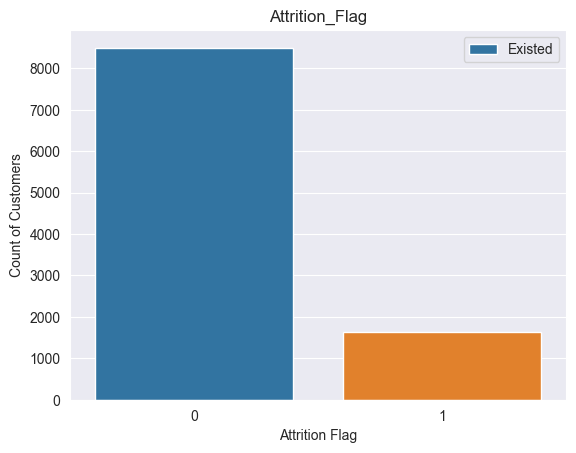

In [16]:
#Graph 1: Count Plot of Attrition Flag

import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(df, x=target_var)

plt.title(target_var)
plt.xlabel('Attrition Flag')
plt.ylabel('Count of Customers')
plt.legend(["Existed", "Churned"])
plt.show()

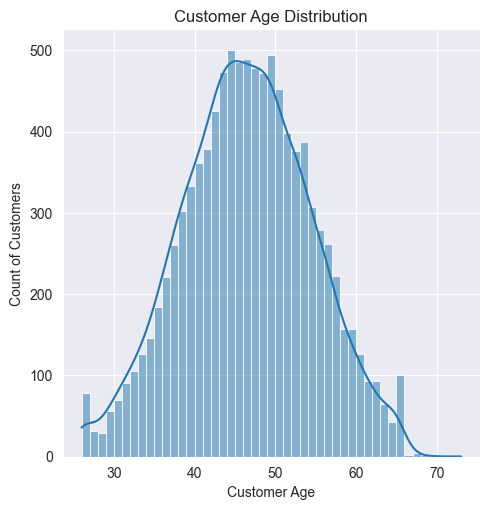

In [17]:
#Graph 2: Distribution of Customers's Age
import seaborn as sns

ax = sns.displot(df, x=df['Customer_Age'], kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Customer Age')
plt.ylabel('Count of Customers')
plt.show()


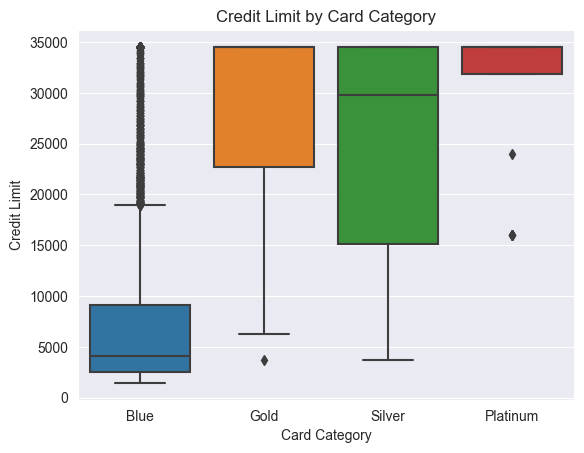

In [18]:
#Graph 3: Bar Plot of Card Categories


sns.boxplot(df, x='Card_Category', y='Credit_Limit')
plt.title('Credit Limit by Card Category')
plt.xlabel('Card Category')
plt.ylabel('Credit Limit')
plt.show()

In [19]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,1,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


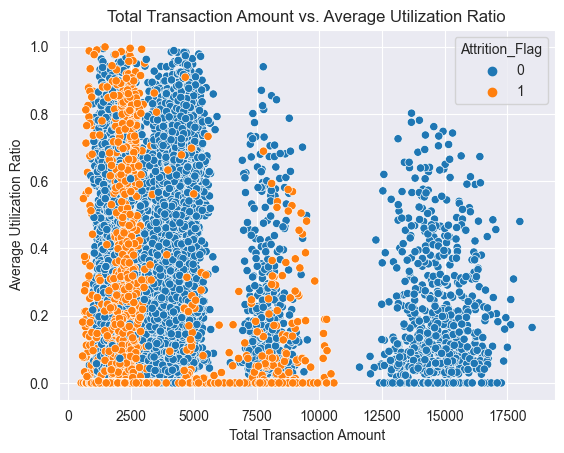

In [20]:
#Graph 4: Scatterplot

sns.scatterplot(data=df,
                x='Total_Trans_Amt',
                y='Avg_Utilization_Ratio',
                hue='Attrition_Flag')

plt.title('Total Transaction Amount vs. Average Utilization Ratio')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Average Utilization Ratio')
#plt.colorbar(label='Attrition Flag')
plt.show()

#  5. What are the different ways to handle categorical columns?


Before training machine learning algorithm we need to convert categorical columns



Approaches:

One-Hot Encoding
Ordinal Encoding

# 6. Encode categorical columns with 1-hot encoding

How many binary columns after encoding do you have? Use `OneHotEncoder` from `slearn.preprocessing` module with `sparse=False` parameter. See example below.


In [21]:
# Example dataframe
df_example = pd.DataFrame([['Male', 1], ['Female', 3], ['Female', 2]], columns=['Sex', 'Age'])
df_example

,Sex,Age
0,Male,1
1,Female,3
2,Female,2


In [22]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder

oh_encoder = OneHotEncoder(sparse=False)

cat_encoded = oh_encoder.fit_transform(df[cat_cols])

df_encoded = pd.DataFrame(cat_encoded, columns=oh_encoder.get_feature_names_out(cat_cols))

print("Number of binary columns after encoding:", df_encoded.shape[1])

Number of binary columns after encoding: 23


/Users/andrey/PycharmProjects/ds-for-business/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Drop original categorical columns and concat encoded with the numerical columns

assuming your encoded columns are in `df_encoded` variable

In [23]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,1,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [24]:
df = df.drop(columns=cat_cols)

In [25]:
df = pd.concat([df, df_encoded], axis=1)

In [26]:
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,3,12691.0,777,11914.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,49,5,44,6,1,2,8256.0,864,7392.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0,51,3,36,4,1,0,3418.0,0,3418.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,40,4,34,3,4,1,3313.0,2517,796.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,40,3,21,5,1,0,4716.0,0,4716.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# 7. Split data intro train and test parts

Set the size of the test set to 30%, use startification over the target column (to preserve target ratio in train and test sets). Use `random_state=10`. How many observations do you have in your test set?


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=target_var), df[target_var],
                                                    random_state=10,
                                                    stratify=df[target_var].values,
                                                    test_size=.3)

In [29]:
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (7088, 37)
Test Size:  (3039, 37)


# 8. This is a binary classification problem with  imbalanced classes, what are the appropriate metrics for this task?

select all which apply

- Accuracy score
- ROC-AUC core
- F1-score
- mean absolute error
- r-squared
- precision

- Accuracy score
- ROC-AUC core
- F1-score
- Precision

# 9. Train a Random Forest Classifier on a `train` set

Use RandomForestClassifier with default hyperparameters. What is the f1 score of a trained model on a test set?

In [30]:
from sklearn import metrics

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)

In [33]:
print(metrics.classification_report(y_test, y_pred_rf[:, 1] > 0.5))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2551
           1       0.91      0.77      0.84       488

    accuracy                           0.95      3039
   macro avg       0.93      0.88      0.90      3039
weighted avg       0.95      0.95      0.95      3039



# 10. Build a confusion matrix with a default probability threshold (0.5)

To analyse the resulting algorithm we will take a closer look on individual predictions. How many False Positives and False Negatives do you have?


In [34]:
from sklearn.metrics import confusion_matrix

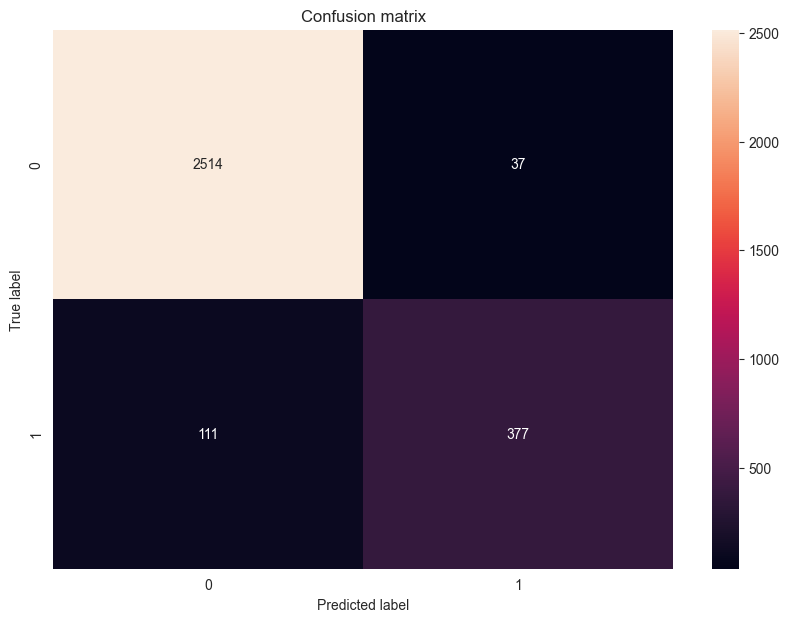

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_rf[:, 1] > 0.5)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# 11. We will change probability threshold from 0.05 to 0.95 with step 0.05

What happens to the number of True Positives and to the number of False Negatives, as you increase the probability threshold?

As we increase the probability threshold our predictions become more conservative (predict Churn only for observations with high probability), therefore Number of TP decreases and number of FN increases


In [36]:
import numpy as np

In [37]:
true_positives = []
false_negatives = []
for t in np.linspace(0.05,0.95,19):
    cm = confusion_matrix(y_test, y_pred_rf[:, 1] > t)
    tp, fn = cm[1,1], cm[1,0]
    true_positives.append(tp)
    false_negatives.append(fn)

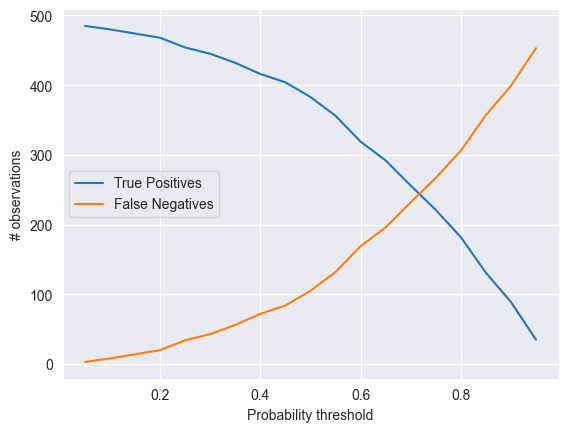

In [38]:
plt.plot(np.linspace(0.05,0.95,19), true_positives, label='True Positives')
plt.plot(np.linspace(0.05,0.95,19), false_negatives, label='False Negatives')
plt.xlabel('Probability threshold')
plt.ylabel('# observations')
plt.legend();

# 12. Estimate revenue

Let's consider a toy economic setup:

1. Each client earns a company 50 USD per month
2. If you predict that a client will churn, the company can provide she with a discount of 200 USD and the client will stay for another year

If the company do nothing (has no Churn model), then the revenue over the year will be:

$$S = N*50*12 + P*0$$

where N (negative) is number of non-Churn clients, and P (positive) is number of clients who Churn. If the company implements some Churn model, the revenue will be the following:

$$S = TN*50*12 + FP*(50*12-200) + TP*(50*12-200)  + FN * 0$$

where 
- TN are non-Churning clients, predicted as non-Churning (true negatives)
- FP are non-Churning clients, predicted as Churning (false positives)
- TP are Churning clients, predicted as Churning (true positives)
- FN are Churning clients, predicted as non-Churning (false negatives)

## Compute the revenue for different thresholds based on your model, what is the optimal probability threshold? Report two numbers divided by a comma, e.g. `0.5,1500000`

In [39]:
def calculate_revenue(cm, earnings=50, retention_cost=200):
    tn, fp, tp, fn = cm[0, 0], cm[0, 1], cm[1, 1], cm[1, 0]
    return tn * earnings * 12 + fp * (earnings * 12 - retention_cost) + tp * (earnings * 12 - retention_cost)

In [40]:
import numpy as np
from sklearn.metrics import confusion_matrix

profit = []

num_int = 19

thresholds = np.linspace(0.05, 0.95, num_int)


for t in thresholds:
    cm = confusion_matrix(y_test, y_pred_rf[:, 1] > t)
    s = calculate_revenue(cm)
    profit.append(s)

# Find the index of the maximum profit
optimal_index = np.argmax(profit)
optimal_threshold = thresholds[optimal_index]
optimal_revenue = profit[optimal_index]

# Print the optimal probability threshold and revenue
print("Optimal probability threshold:", optimal_threshold)
print("Optimal revenue:", optimal_revenue)


Optimal probability threshold: 0.35
Optimal revenue: 1688000


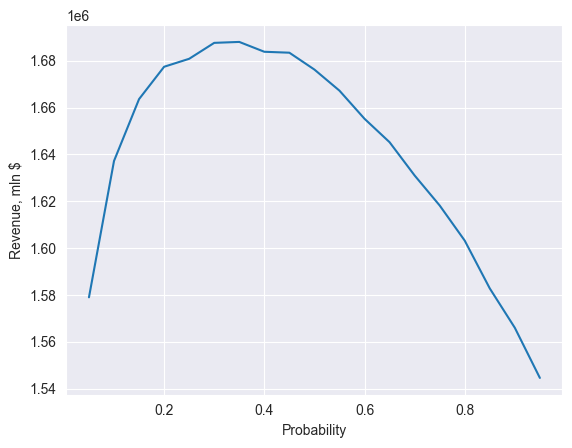

In [41]:
plt.plot(np.linspace(0.05,0.95,19), profit);
plt.xlabel('Probability')
plt.ylabel('Revenue, mln $');

In [42]:
# Find the index of the maximum profit
optimal_index = np.argmax(profit)
optimal_threshold = np.linspace(0.05,0.95,19)[optimal_index]
optimal_revenue = profit[optimal_index]

# Print the optimal probability threshold and revenue
print("Optimal probability threshold:", optimal_threshold)
print("Optimal revenue:", optimal_revenue)


Optimal probability threshold: 0.35
Optimal revenue: 1688000


# 13. Compute economic value

Is there any economic value from introducing a ML model (compared to not using a model and not providing a discounts)?

First scenario - no ML model, no discounts; Second scenario - ML model from question 12.

In [43]:
ttl_n = y_test.sum()

base_revenue = ttl_n * 50 * 12

print('Baseline revenue:', base_revenue)
print("Optimal revenue:", optimal_revenue)
print("Difference between base and ML: ", base_revenue - optimal_revenue)

Baseline revenue: 292800
Optimal revenue: 1688000
Difference between base and ML:  -1395200


# 14. Build a confusion matrix

assosiated with an optimal probability threshold. What happend to the number of False Positives and False Negatives, compared to the default probability threshold (question 10)?

Since we decreased probability threshold number of FP goes up, number of FN goes down

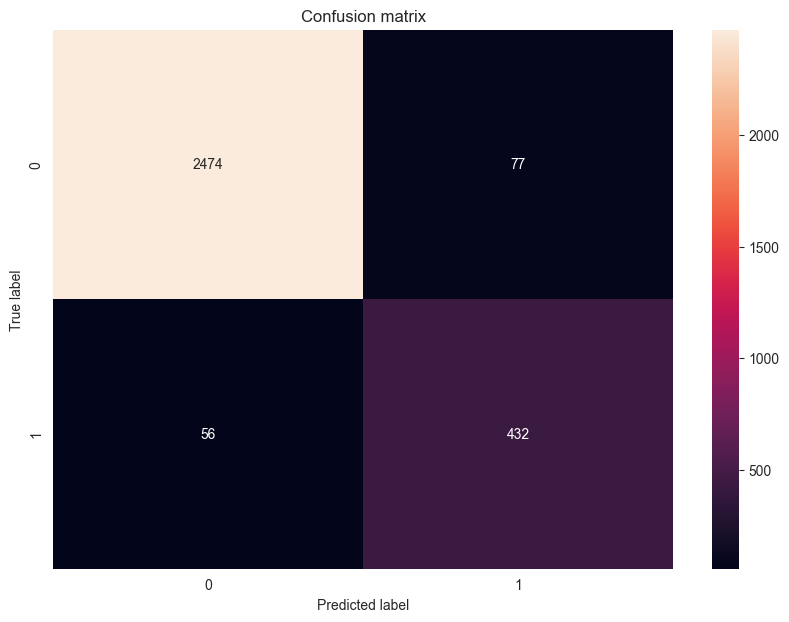

In [44]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_rf[:, 1] > 0.35)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# 15. What if the price to keep the client goes up to 500?

Does optimal probability treshold changes?

In [45]:
profit = []

for t in thresholds:
    cm = confusion_matrix(y_test, y_pred_rf[:, 1] > t)
    s = calculate_revenue(cm, retention_cost=500)
    profit.append(s)

# Find the index of the maximum profit
optimal_index = np.argmax(profit)
optimal_threshold = thresholds[optimal_index]
optimal_revenue = profit[optimal_index]

# Print the optimal probability threshold and revenue
print("Optimal probability threshold:", optimal_threshold)
print("Optimal revenue:", optimal_revenue)

Optimal probability threshold: 0.6
Optimal revenue: 1555000


# 16. Built an assosiated confusion matrix

How many False Positives and False Negatives do you have?

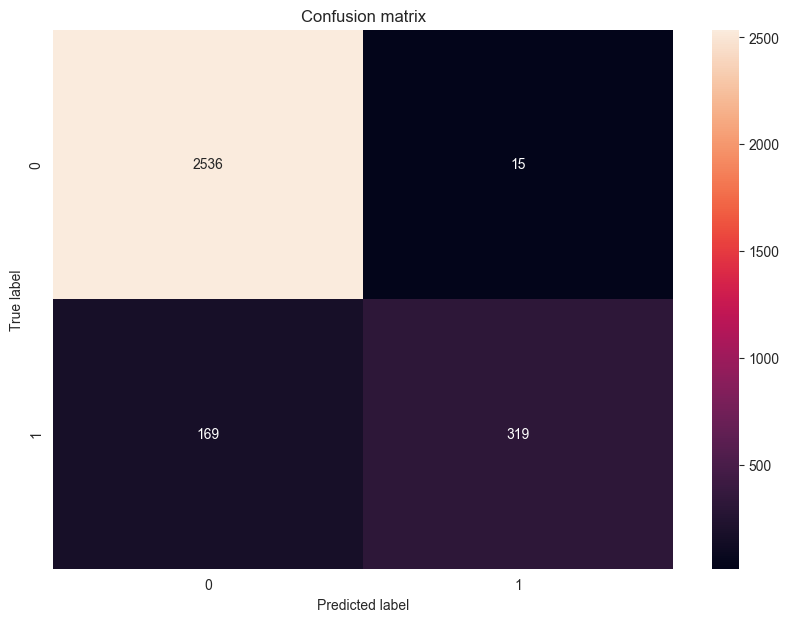

In [46]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_rf[:, 1] > optimal_threshold)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# 17. Compare confusion matrices from 14 and 16


Our model has become more conservative. Since the retention price has increased, it has become more profitable for us to get the most accurate predictions (TP) so as not to spend extra money

*We began to focus more on Precision than Recall


# 18. Train catboost

Train a catboost.CatBoostClassifier on a **unprocessed data** (no preprocessing for categorical columns) with default hyperparameters, see example below.

In [47]:
df = pd.read_csv('BankChurners.csv')

# We will drop two last columns from the table
df = df.drop([
    'CLIENTNUM',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
    axis=1)

df['Attrition_Flag'] = df['Attrition_Flag'].map(chrn_map)

In [48]:
from catboost import CatBoostClassifier

categorical_columns = list(cat_cols)
categorical_columns

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [49]:
df_train, df_test = train_test_split(df, test_size=0.3, stratify=df['Attrition_Flag'])

In [50]:
clf = CatBoostClassifier()

In [51]:
clf.fit(df_train.drop('Attrition_Flag', axis=1), df_train['Attrition_Flag'], cat_features=categorical_columns)

Learning rate set to 0.023774
0:	learn: 0.6623736	total: 65ms	remaining: 1m 4s
1:	learn: 0.6359164	total: 69.5ms	remaining: 34.7s
2:	learn: 0.6099938	total: 73.9ms	remaining: 24.6s
3:	learn: 0.5840664	total: 78.1ms	remaining: 19.4s
4:	learn: 0.5629760	total: 82.6ms	remaining: 16.4s
5:	learn: 0.5425145	total: 87ms	remaining: 14.4s
6:	learn: 0.5200784	total: 92.2ms	remaining: 13.1s
7:	learn: 0.5001196	total: 98.3ms	remaining: 12.2s
8:	learn: 0.4792086	total: 103ms	remaining: 11.3s
9:	learn: 0.4618543	total: 108ms	remaining: 10.7s
10:	learn: 0.4435597	total: 111ms	remaining: 10s
11:	learn: 0.4278546	total: 115ms	remaining: 9.5s
12:	learn: 0.4155352	total: 119ms	remaining: 9.07s
13:	learn: 0.3995121	total: 124ms	remaining: 8.74s
14:	learn: 0.3886578	total: 128ms	remaining: 8.41s
15:	learn: 0.3732528	total: 132ms	remaining: 8.14s
16:	learn: 0.3595289	total: 137ms	remaining: 7.89s
17:	learn: 0.3510080	total: 141ms	remaining: 7.69s
18:	learn: 0.3402104	total: 145ms	remaining: 7.48s
19:	learn:

In [52]:
y_pred_proba_cbc = clf.predict_proba(df_test.drop('Attrition_Flag', axis=1))
y_pred_cbc = clf.predict(df_test.drop('Attrition_Flag', axis=1))

y_pred_proba_cbc[:, 1]

array([3.96243678e-02, 1.96528590e-03, 2.33253143e-04, ...,
       4.70593784e-02, 9.69391384e-01, 8.94557071e-01])

In [53]:
print(metrics.classification_report(df_test['Attrition_Flag'].values,y_pred_cbc))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2551
           1       0.93      0.89      0.91       488

    accuracy                           0.97      3039
   macro avg       0.96      0.94      0.95      3039
weighted avg       0.97      0.97      0.97      3039



# 19. Compute ROC AUC score for your RandomForest and Catboost model

Comment on how increase/decrease in roc auc (machine learning metric) compares with increase/decrease of revenue (business metric). Propose how you could improve the economic model to make it more realistic (and how to use your ML model in this new setup). Upload a pdf, up to 500 words.

In [54]:
def plot_roc_auc_curve(y_pred_proba, y_real, title):
    fpr, tpr, _ = metrics.roc_curve(y_real,  y_pred_proba)
    auc = metrics.roc_auc_score(y_real, y_pred_proba)


    #create ROC curve
    plt.plot(fpr,tpr, label="AUC: {:.5f}".format(auc))
    plt.title(title)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.axline((0, 0), color='red', slope=1)
    plt.legend(loc=4)
    plt.show()

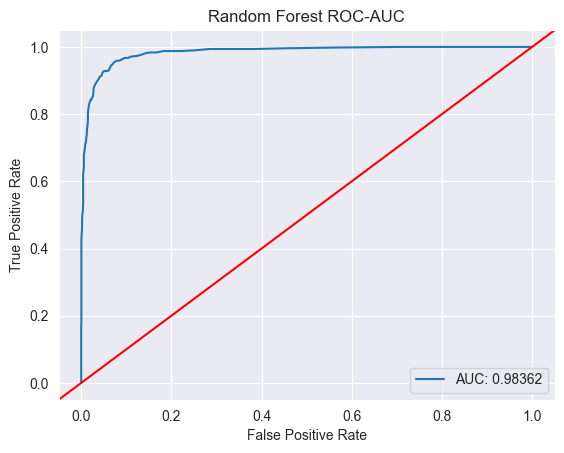

In [55]:
plot_roc_auc_curve(y_pred_rf[:, 1], y_real=y_test, title='Random Forest ROC-AUC')

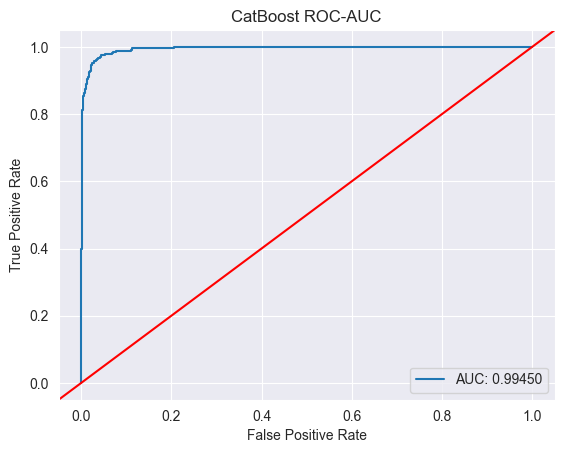

In [56]:
plot_roc_auc_curve(y_pred_proba_cbc[:, 1], y_real=df_test[target_var].values, title='CatBoost ROC-AUC')

# 20. Upload your ipynb solution